### netflix study secondary EDA, data visualization: scatter plots, pandas profiling etc, Kmeans clustering
Steven Bowler UTRGV Masters Science

Due to the size of the df_p dataset must execute this from the Anaconda power shell before opening this notebook:

<font color=red>jupyter notebook --NotbookApp.iopub_Data_Rate_Limit=1e10

### References
https://github.com/anjanatiha/Movie-Recommendation-Engine-using-User-Based-Collaborative-Filtering

In [4]:
# Import necessary modules
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.cluster import KMeans

In [5]:
df_p = pd.read_csv('../data/processed/df_p.csv')

In [7]:
df_p.head()

,Cust_Id,3,8,16,17,18,26,28,30,33,...,17741,17743,17751,17756,17758,17761,17762,17763,17764,17769
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_p_avg_ratings = df_p.groupby(by='mapping', level=0, axis=1).mean()

In [16]:
df_p_avg_ratings.head()

,10002,10004,1001,10012,10013,10018,10019,10022,10024,10027,...,9974,9981,9983,9984,9985,9986,9987,9988,9991,Cust_Id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0


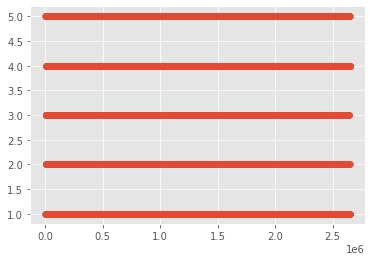

In [12]:
plt.scatter(df_p['Cust_Id'], df_p['8'])

In [35]:
# customer_average = df[df['Cust_Id']==Customer_id].Rating.mean(axis=1)

# avg_array = []
# for i in range(df_p["Cust_Id"]):
#     customer_average = df_p[df_p['Cust_Id']==Customer_Id].mean(axis=1)
#     avg_array.append(customer_average)

df_p['Average'] = df_p.mean(axis=1)

In [33]:
df_p.head()

,Cust_Id,3,8,16,17,18,26,28,30,33,...,17743,17751,17756,17758,17761,17762,17763,17764,17769,Average
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2192.049269
1,7,NaN,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,1519.220102
2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5219.813079
3,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1728.802234
4,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2718.927385


### Git Kmeans project using pivot table found 19oct2020

https://programming.rhysshea.com/K-means_movie_ratings/

To have sklearn run k-means clustering to a dataset with missing values like this, we will first cast it to the sparse csr matrix type defined in the SciPi library.

To convert from a pandas dataframe to a sparse matrix, we'll have to convert to SparseDataFrame, then use pandas' to_coo() method for the conversion.

Note: to_coo() was only added in later versions of pandas. If you run into an error with the next cell, make sure pandas is up to date.

In [37]:
from scipy.sparse import csr_matrix

Also might need to use df_p.values.T since columns are axis zero

didn't work: sparse_ratings = csr_matrix(pd.DataFrameSparse(df_p).to_coo())  # error doesn't accept df_p 

In [42]:
# sparse_ratings = csr_matrix(pd.DataFrame(df_p).sparse.to_coo())   
sparse_ratings = csr_matrix(df_p.values)

In [53]:
# how many nan in df_p
count_nan = np.isnan(df_p.values).sum()

In [54]:
count_nan

698000651

In [43]:
sparse_ratings.shape

(144380, 5334)

In [46]:
sparse_ratings

<144380x5334 sparse matrix of type '<class 'numpy.float64'>'
	with 770122920 stored elements in Compressed Sparse Row format>

In [58]:
# KMeans failing due to either infinite or NaN value, so looking for filter
sparse_prep1 = np.all(np.isfinite(df_p.values))

In [64]:
# false means no infinite values in the sparse matrix, this is what we expected
sparse_prep1

False

In [68]:
# convert to int to stop crashing in KMeans
sparse_ratings_int = sparse_ratings.astype(int)

In [ ]:
# KMeans failing due to NaN so clean up again, looking for filter
# sparse_prep2_ratings_noNan = np.any(np.isnan(sparse_ratings))

In [66]:
# False means no NaN value in the sparse array, just what we were expecting ... now what?????
sparse_prep2_ratings_noNan

True

In [60]:
sparse_ratings_v2 = csr_matrix(sparse_prep2_ratings_noNan)

In [62]:
sparse_ratings_v2

<1x1 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

In [ ]:
# predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)
# predictions = KMeans(n_clusters=5, algorithm='full').fit_predict(sparse_ratings)
# predictions = KMeans(n_clusters=5, algorithm='full').fit_predict(df_p)
predictions = KMeans(n_clusters=5, algorithm='full').fit_predict(sparse_ratings_int)


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_sparse'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


Plot Clusters as a heat map

In [49]:
max_users = 70
max_movies = 50

# not sure use df_p or sparse_ratings
clustered = pd.concat([df_p.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
helper.draw_movie_clusters(clustered, max_users, max_movies)

NameError: name 'predictions' is not defined